In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('user_behavior_dataset.csv')
data.head()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   User ID                     700 non-null    int64  
 1   Device Model                700 non-null    object 
 2   Operating System            700 non-null    object 
 3   App Usage Time (min/day)    700 non-null    int64  
 4   Screen On Time (hours/day)  700 non-null    float64
 5   Battery Drain (mAh/day)     700 non-null    int64  
 6   Number of Apps Installed    700 non-null    int64  
 7   Data Usage (MB/day)         700 non-null    int64  
 8   Age                         700 non-null    int64  
 9   Gender                      700 non-null    object 
 10  User Behavior Class         700 non-null    int64  
dtypes: float64(1), int64(7), object(3)
memory usage: 60.3+ KB


In [16]:
numerical_columns = ['App Usage Time (min/day)', 'Screen On Time (hours/day)', 
                     'Battery Drain (mAh/day)', 'Number of Apps Installed', 
                     'Data Usage (MB/day)', 'Age', 'User Behavior Class']

desc_stats = data[numerical_columns].describe()
desc_stats
Q1 = data[numerical_columns].quantile(0.25)
Q3 = data[numerical_columns].quantile(0.75)
IQR = Q3 - Q1
outliers = ((data[numerical_columns] < (Q1 - 1.5 * IQR)) | (data[numerical_columns] > (Q3 + 1.5 * IQR)))
outliers.sum()  

App Usage Time (min/day)      0
Screen On Time (hours/day)    0
Battery Drain (mAh/day)       0
Number of Apps Installed      0
Data Usage (MB/day)           0
Age                           0
User Behavior Class           0
dtype: int64

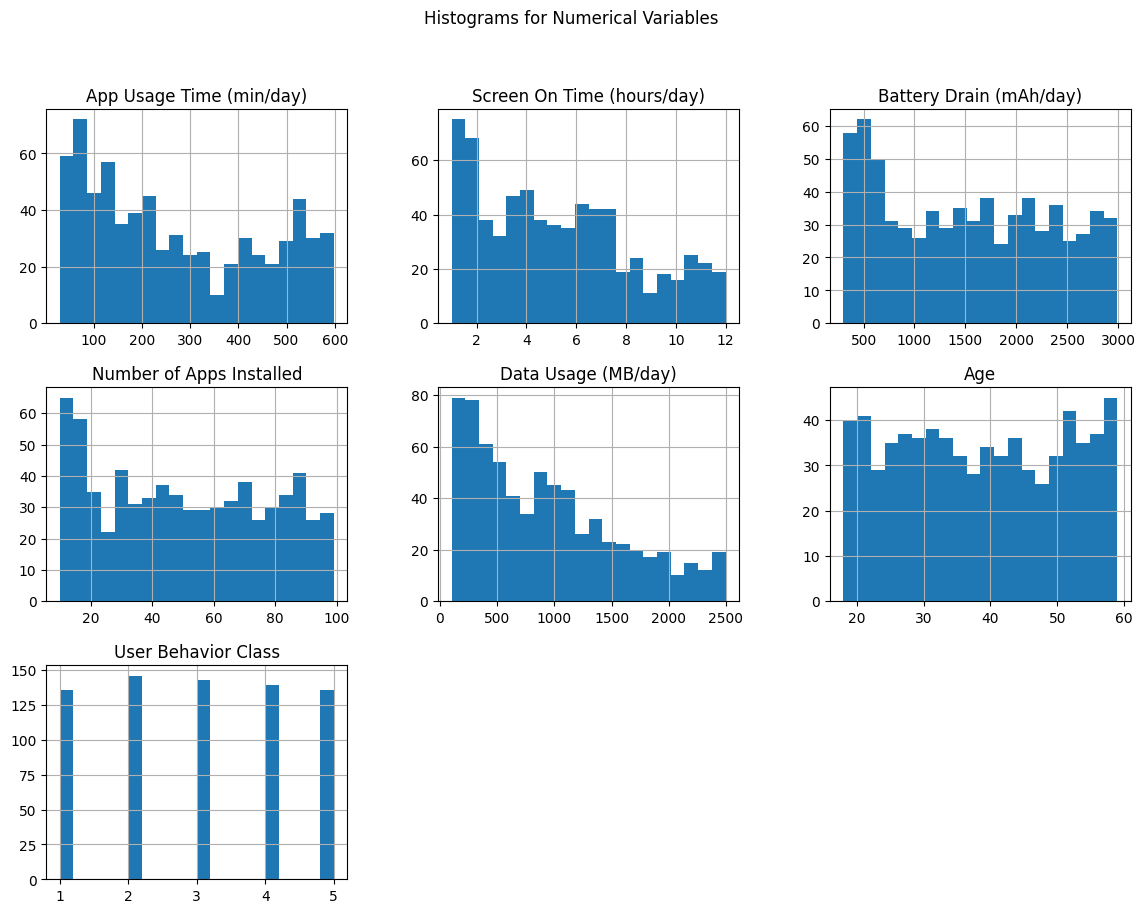

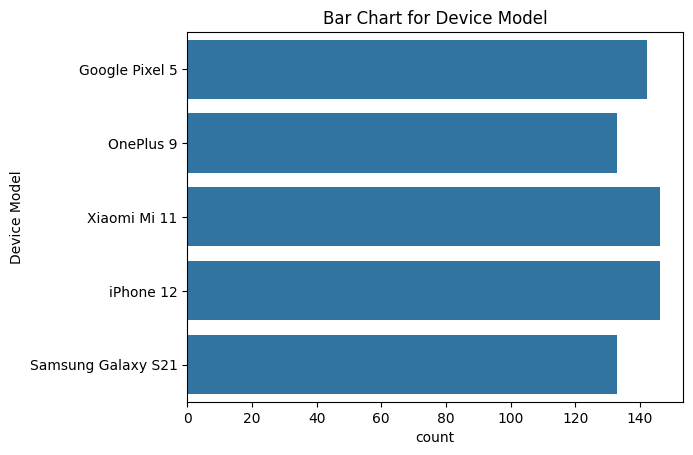

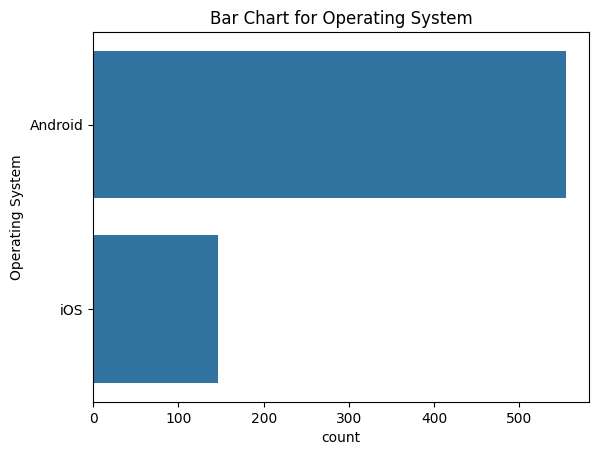

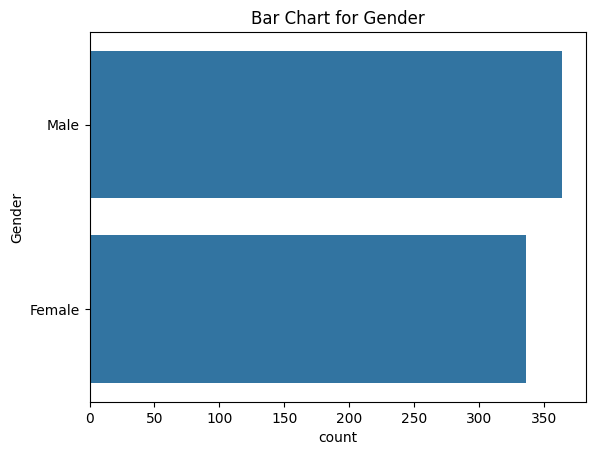

In [17]:
data[numerical_columns].hist(bins=20, figsize=(14, 10))
plt.suptitle("Histograms for Numerical Variables")
plt.show()

categorical_columns = ['Device Model', 'Operating System', 'Gender']
for col in categorical_columns:
    sns.countplot(data[col])
    plt.title(f"Bar Chart for {col}")
    plt.show()

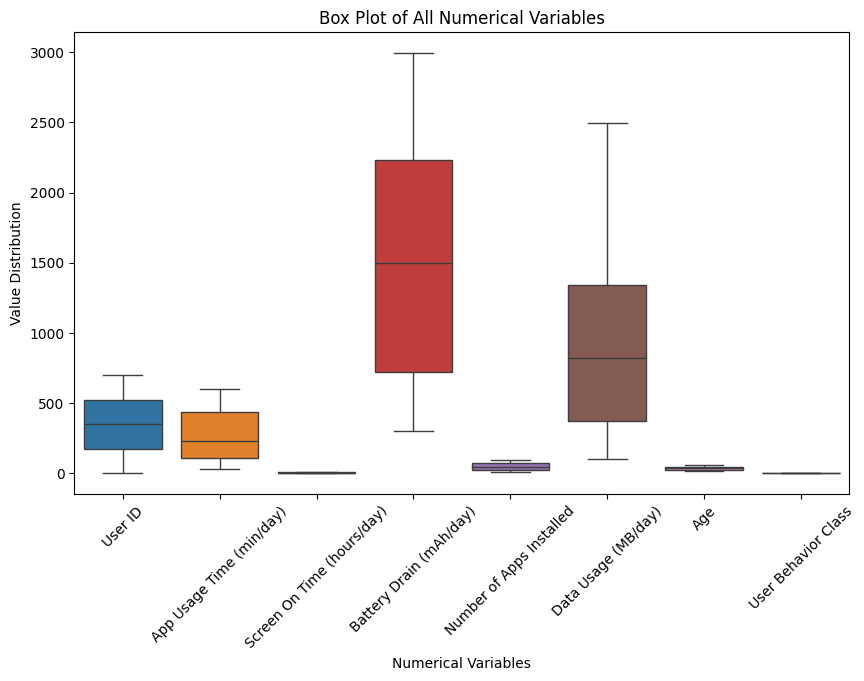

In [11]:
plt.figure(figsize=(10,6))
sns.boxplot(data=data.select_dtypes(include=['int64', 'float64'])) 

plt.xticks(rotation=45) 
plt.xlabel('Numerical Variables')  
plt.ylabel('Value Distribution') 
plt.title('Box Plot of All Numerical Variables')

plt.show()

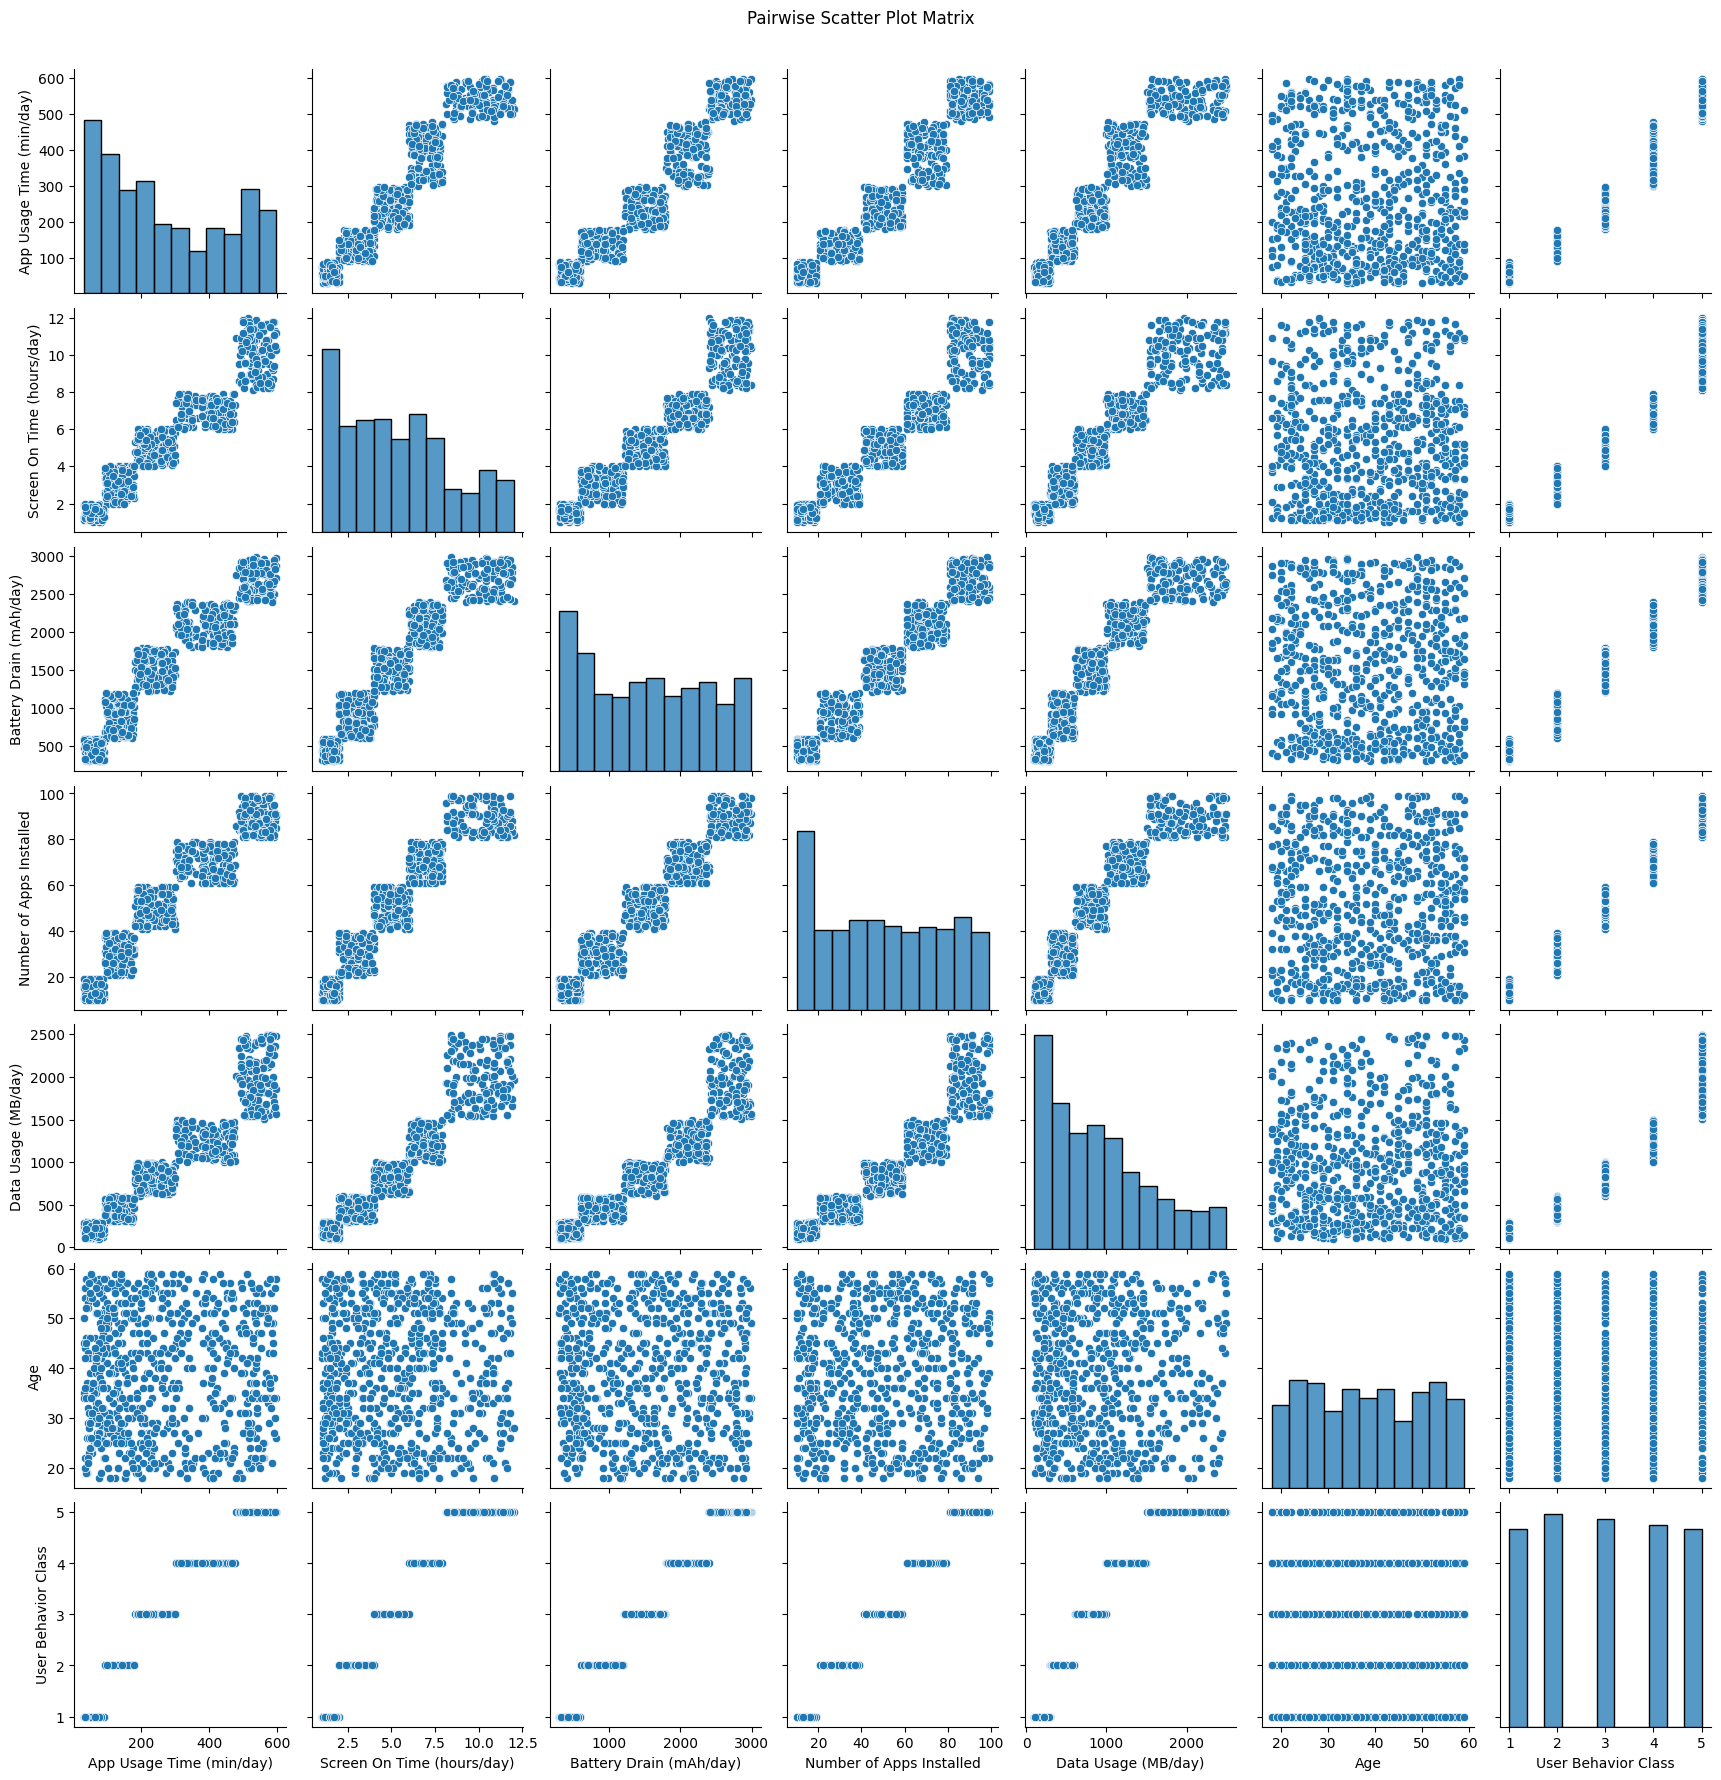

In [18]:
sns.pairplot(data[numerical_columns])
plt.suptitle("Pairwise Scatter Plot Matrix", y=1.02)
plt.show()

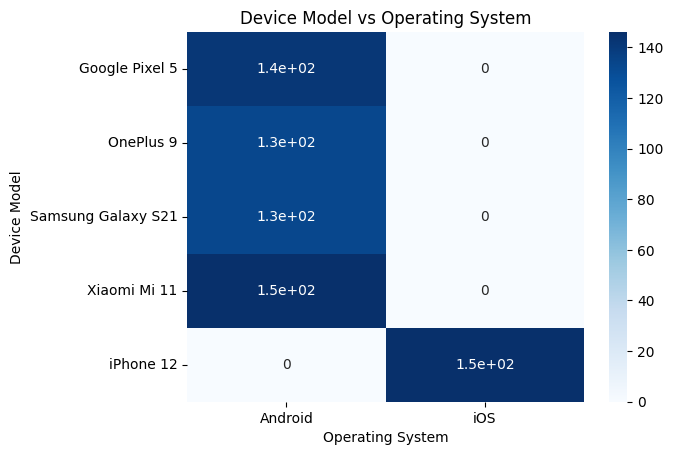

In [19]:
cross_tab = pd.crosstab(data['Device Model'], data['Operating System'])
sns.heatmap(cross_tab, annot=True, cmap='Blues')
plt.title('Device Model vs Operating System')
plt.show()

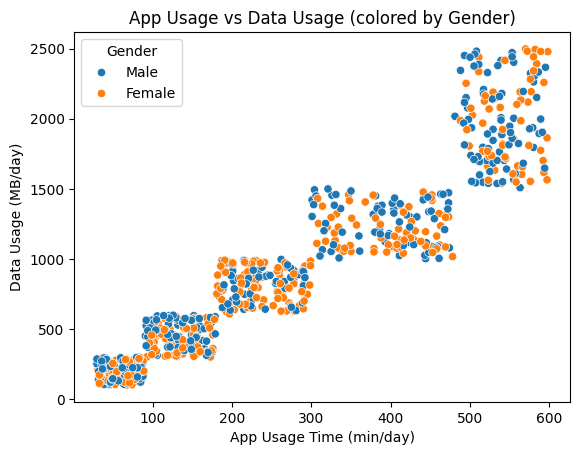

In [20]:
sns.scatterplot(x='App Usage Time (min/day)', y='Data Usage (MB/day)', hue='Gender', data=data)
plt.title('App Usage vs Data Usage (colored by Gender)')
plt.show()